# Flowers classification per species (Basic Proyect)

In this notebook, i used the KMeans model from Sklearn to create an algorithm capable of distinguishing different flower species by anlyzing their dimensions (leaf length for example). The Analyzed dataset was taken from the following link: https://github.com/theengineeringworld/Python-data-science/blob/master/iris.csv. 

## Importo las herramientas necesarias

In [29]:
#Libraries

import numpy as np
import pandas as pd
import sklearn
import mysql.connector

# To get inline plotes
import matplotlib.pyplot as plt

# Sklearn functions
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

%matplotlib inline

## Load / Analyze the data

In [30]:
db = mysql.connector.connect(
    host = "localhost",
    user="root",
    password="SAntafeclan1"
    )

mycursor = db.cursor()
mycursor.execute("use proyectos")

df = pd.read_sql("SELECT * FROM flowers", con = db)
df.head()

,MyUnknownColumn,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


We have a "Species" column. In a real life scenario, this column would not exist, bout being this a study proyect, 
the information given by that column will be useful to check how well our model performed.

In [31]:
# I tidy up the column names
df.set_axis(["unnamed", 
             "sepal length",
             "sepal width", 
             "petal length",
             "petal width", 
             "species"],
             axis=1, 
             inplace=True)
df.head(3)

,unnamed,sepal length,sepal width,petal length,petal width,species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa


In [32]:
# divide in features (X) and target (y)
X = df.drop(["species", "unnamed"], axis=1)
y = df["species"]
y.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [33]:
# Scale the features
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)
X = pd.DataFrame(X)
X.head(3)

,0,1,2,3
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667


# Clustering 

In [34]:
# Create an instance for KMeans with 3 clusters (the ammount of species in the data is known)
np.random.seed(42)
clustering = KMeans(n_clusters = 3, 
                    n_init = 80, 
                    max_iter= 380)
# Fit
clustering.fit(X)

KMeans(max_iter=380, n_clusters=3, n_init=80)

In [35]:
# Create an DataFrame with the real labels
real_labels = pd.DataFrame(y)
# Create an array with the predicted labels
predicted_labels = clustering.labels_

# Change the species names for numbers in the real labels DataFrame
real_labels.replace("setosa",1, inplace = True )
real_labels.replace("virginica", 0, inplace = True)
real_labels.replace("versicolor", 2, inplace = True) 
real_labels = np.array(real_labels) # Make it an array again

# Plotting model outputs

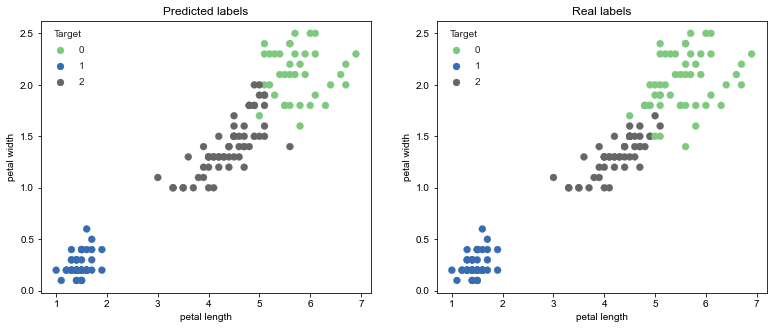

In [36]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize = (13, 5))
plt.style.use("seaborn")
scatter1 = ax1.scatter(df["petal length"], 
                  df["petal width"],
                  c = predicted_labels,
                  cmap = "Accent")
ax1.set(title = "Predicted labels", 
        xlabel= "petal length",
        ylabel= "petal width")

scatter2 = ax2.scatter(df["petal length"], 
                  df["petal width"],
                  c = real_labels,
                  cmap = "Accent")

ax2.set(title = "Real labels", 
        xlabel= "petal length",
        ylabel= "petal width")

ax1.legend(*scatter1.legend_elements(), title="Target")
ax2.legend(*scatter2.legend_elements(), title="Target");

The moddel did pretty good. Lets get some more exact metrics:

In [37]:
print(classification_report(real_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.92      0.72      0.81        50
           1       1.00      1.00      1.00        50
           2       0.77      0.94      0.85        50

    accuracy                           0.89       150
   macro avg       0.90      0.89      0.89       150
weighted avg       0.90      0.89      0.89       150

